In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Dataset

In [2]:
dataset = pd.read_csv("occupancy.csv")
dataset.head()
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [3]:
X = dataset[['Light', 'CO2','Humidity']].values
y = dataset[['Occupancy']].values

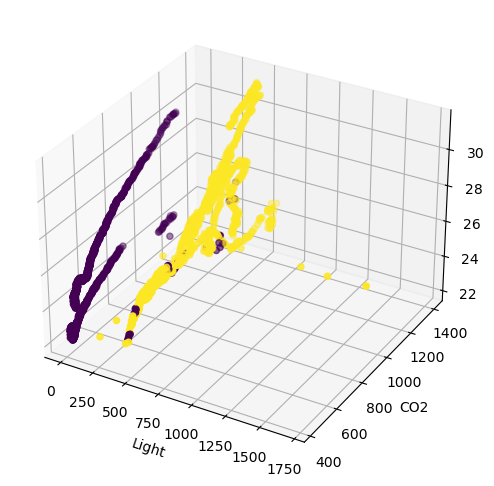

In [4]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que 'y' contienne les étiquettes d'occupation binaires (0 ou 1).

# Créer une figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Afficher le nuage de points 3D
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.flatten(), marker='o')

# Ajouter des étiquettes d'axe
ax.set_xlabel('Light')
ax.set_ylabel('CO2')
ax.set_zlabel('Humidity')

# Vérifier si la méthode set_zlabel existe pour la version spécifique de Matplotlib
if hasattr(ax, 'set_zlabel'):
    ax.set_zlabel('Humidity')

# Afficher le graphique
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train  : ',X_train.shape)
print('y_train  : ',y_train.shape)
print('x_test : ',X_test.shape)
print('y_test : ',y_test.shape)

x_train  :  (2132, 3)
y_train  :  (2132, 1)
x_test :  (533, 3)
y_test :  (533, 1)


In [6]:
xtrain_mean = np.mean(X_train,axis=0)
xtrain_std = np.std(X_train,axis=0)

X_train = (X_train - xtrain_mean)/xtrain_std
X_test = (X_test - xtrain_mean)/xtrain_std
#X_train = (X_train - X_train.mean())/X_train.std()
#X_test = (X_test - X_test.mean())/X_test.std()



### 2. Modèle


In [7]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [9]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [10]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [11]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [12]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [13]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [14]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

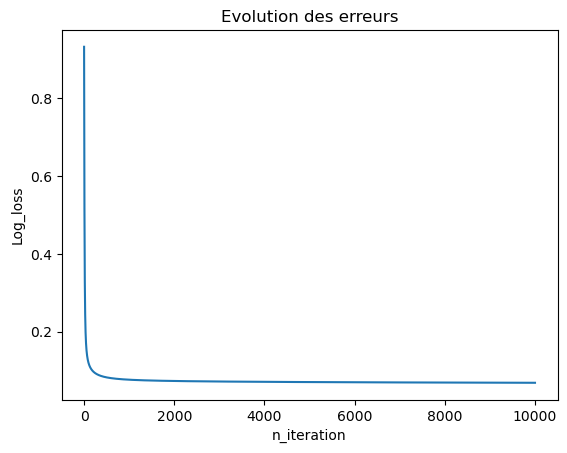

In [15]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [16]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))
print(y_pred)

[[9.92738411e-01]
 [9.98352577e-01]
 [4.59334770e-04]
 [9.94891854e-01]
 [1.19170590e-02]
 [8.14723632e-03]
 [3.71225671e-04]
 [4.63051836e-04]
 [3.99534568e-04]
 [9.90725140e-01]
 [9.84326267e-01]
 [9.87001474e-01]
 [9.88977425e-01]
 [4.24965524e-04]
 [9.69943771e-01]
 [4.57607856e-04]
 [2.59653320e-03]
 [2.13394956e-02]
 [1.88426904e-03]
 [2.72262162e-03]
 [5.54859370e-04]
 [3.62012482e-04]
 [2.80496252e-03]
 [2.14492103e-03]
 [9.93508112e-01]
 [3.98921040e-04]
 [8.11466489e-01]
 [4.98038945e-03]
 [8.39324517e-01]
 [9.82628473e-01]
 [4.31556807e-04]
 [9.95580011e-01]
 [1.49552371e-03]
 [9.85254689e-01]
 [4.65612313e-04]
 [5.72659616e-04]
 [9.87366929e-01]
 [9.83362587e-01]
 [9.92672915e-01]
 [9.85064796e-01]
 [2.98804859e-03]
 [3.98863872e-04]
 [5.82538971e-04]
 [3.27856563e-03]
 [7.42365649e-04]
 [1.98159510e-03]
 [9.87023050e-01]
 [1.44684378e-03]
 [3.66205496e-04]
 [3.50745794e-03]
 [4.80014865e-04]
 [9.01869057e-01]
 [9.91570078e-01]
 [3.02050301e-03]
 [3.73355820e-03]
 [9.858374

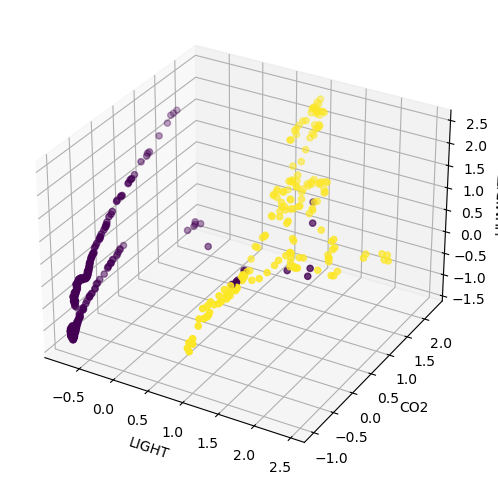

[0.16107989]
[False]
[0.92605822]
[ True]
[0.88532682]
[ True]


In [17]:
# Visualiser le dataset
"""fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(1, -1, 10)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)
"""



# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supposons que 'y' contienne les étiquettes d'occupation binaires (0 ou 1).

# Créer une figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Afficher le nuage de points 3D
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, marker='o')

# Ajouter des étiquettes d'axe
ax.set_xlabel('LIGHT')
ax.set_ylabel('CO2')
ax.set_zlabel('HUMIDITY')


# Afficher le graphique
plt.show()





# Prédire la classe de nouveaux éléments
new_1=np.array([0.1,0.1,0.2])
new_2=np.array([0.8,0.1,0.6])
new_3=np.array([0.9,0.8,0.4])
ax.scatter(new_1[0], new_1[1],new_1[2], c='r')
ax.scatter(new_2[0], new_2[1],new_1[2], c='r')
ax.scatter(new_3[0], new_3[1],new_1[2], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))



<IPython.core.display.Javascript object>


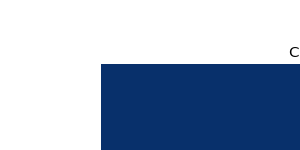

In [18]:

    from mpl_toolkits.mplot3d import Axes3D

# Vos données et modèle (assurez-vous d'avoir défini X_test, y_test, W et b)

%matplotlib notebook 
# Active l'interaction avec la souris pour les graphiques matplotlib dans un notebook

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')  
# Utilisation d'une projection 3D pour afficher la troisième dimension

# Graphique de dispersion avec la troisième caractéristique comme taille des points
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test, cmap='winter', s=50)

# Dessiner la frontière de décision dans l'espace 3D
x1 = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 10)
x2 = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-W[0] * x1 - W[1] * x2 - b) / W[2]
ax.plot_surface(x1, x2, x3, color='red', alpha=0.3)

# Ajouter une légende pour la couleur des points
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Ajouter des labels aux axes
ax.set_xlabel('LIGHT')
ax.set_ylabel('CO2')
ax.set_zlabel('HUMIDITY')

plt.show()


In [19]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9.92738411e-01]
 [9.98352577e-01]
 [4.59334770e-04]
 [9.94891854e-01]
 [1.19170590e-02]
 [8.14723632e-03]
 [3.71225671e-04]
 [4.63051836e-04]
 [3.99534568e-04]
 [9.90725140e-01]
 [9.84326267e-01]
 [9.87001474e-01]
 [9.88977425e-01]
 [4.24965524e-04]
 [9.69943771e-01]
 [4.57607856e-04]
 [2.59653320e-03]
 [2.13394956e-02]
 [1.88426904e-03]
 [2.72262162e-03]
 [5.54859370e-04]
 [3.62012482e-04]
 [2.80496252e-03]
 [2.14492103e-03]
 [9.93508112e-01]
 [3.98921040e-04]
 [8.11466489e-01]
 [4.98038945e-03]
 [8.39324517e-01]
 [9.82628473e-01]
 [4.31556807e-04]
 [9.95580011e-01]
 [1.49552371e-03]
 [9.85254689e-01]
 [4.65612313e-04]
 [5.72659616e-04]
 [9.87366929e-01]
 [9.83362587e-01]
 [9.92672915e-01]
 [9.85064796e-01]
 [2.98804859e-03]
 [3.98863872e-04]
 [5.82538971e-04]
 [3.27856563e-03]
 [7.42365649e-04]
 [1.98159510e-03]
 [9.87023050e-01]
 [1.44684378e-03]
 [3.66205496e-04]
 [3.50745794e-03]
 [4.80014865e-04]
 [9.01869057e-01]
 [9.91570078e-01]
 [3.02050301e-03]
 [3.73355820e-03]
 [9.858374

In [20]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()